In [1]:
from IPython.display import Image
from IPython.core.display import HTML
import scipy.stats as st
import statsmodels.stats.api as sms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Test a perceptual phenomenon: the Stroop effect
https://faculty.washington.edu/chudler/words.html#seffect

In [2]:
Image(url='https://faculty.washington.edu/chudler/colors2.gif')

## Load the dataset with test result

In [3]:
df=pd.read_csv('stroopdata.csv')
df.shape

(24, 2)

Dataset is made of 24 rows and 2 columns: <br>
    - 24 people performed the stroop effect test
    - results of the test (time to read the list of word) are given for the congruent and incongruent conditions

## Descriptive statistics
    - histogram plot of both tests
    - min, max, mean, median, std result of the tests

In [4]:
congruent_sample_size=df.Congruent.count()
congruent_min=df.Congruent.min()
congruent_max=df.Congruent.max()
congruent_mean=df.Congruent.mean()
congruent_median=df.Congruent.median()
congruent_std=df.Congruent.std()

incongruent_sample_size=df.Incongruent.count()
incongruent_min=df.Incongruent.min()
incongruent_max=df.Incongruent.max()
incongruent_mean=df.Incongruent.mean()
incongruent_median=df.Incongruent.median()
incongruent_std=df.Incongruent.std()

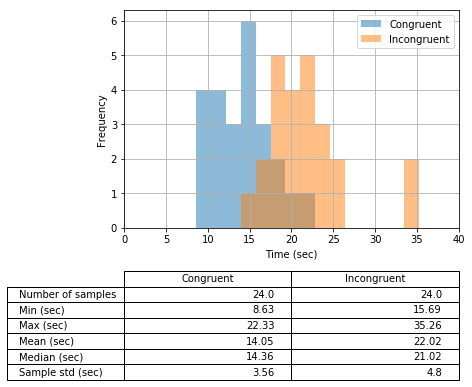

In [5]:
ax=df.plot(kind='hist',y=['Congruent', 'Incongruent'],alpha=0.5,xlim=(0,40),bins=15,grid=True)
ax.set_xlabel('Time (sec)')
colLabels=['Congruent','Incongruent']
rowLabels=['Number of samples','Min (sec)','Max (sec)','Mean (sec)','Median (sec)','Sample std (sec)']
cellText =np.array([[round(congruent_sample_size,0),round(incongruent_sample_size,0)],
                    [round(congruent_min,2),round(incongruent_min,2)],
                    [round(congruent_max,2),round(incongruent_max,2)],
                    [round(congruent_mean,2),round(incongruent_mean,2)],
                    [round(congruent_median,2),round(incongruent_median,2)],
                    [round(congruent_std,2),round(incongruent_std,2)],
                   ])
plt.table(cellText=cellText,rowLabels=rowLabels,colLabels=colLabels,
         bbox=[0, -0.7, 1, 0.5])

The descriptive statistics analysis shows that <br>
    - in average it takes 8 more secondes to carry out the incongruent test compared to the congruent test
    - sample standard deviation for both tests is around 4 secondes
An inferential statistical analysis is required to conclude whether results of both tests are significantly different.

In [6]:
df['delta']=df['Incongruent']-df['Congruent']

In [7]:
delta_sample_size=df.delta.count()
delta_min=df.delta.min()
delta_max=df.delta.max()
delta_mean=df.delta.mean()
delta_median=df.delta.median()
delta_std=df.delta.std()

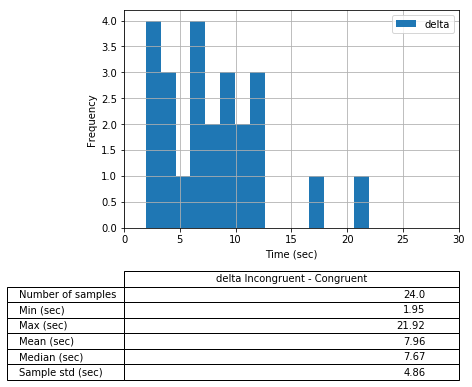

In [8]:
ax=df.plot(kind='hist',y=['delta'],xlim=(0,30),bins=15,grid=True)
ax.set_xlabel('Time (sec)')
colLabels=['delta Incongruent - Congruent']
rowLabels=['Number of samples','Min (sec)','Max (sec)','Mean (sec)','Median (sec)','Sample std (sec)']
cellText =np.array([[round(delta_sample_size,0)],
                    [round(delta_min,2)],
                    [round(delta_max,2)],
                    [round(delta_mean,2)],
                    [round(delta_median,2)],
                    [round(delta_std,2)],
                   ])
plt.table(cellText=cellText,rowLabels=rowLabels,colLabels=colLabels,
         bbox=[0, -0.7, 1, 0.5])

## Statistical test
A paired sample t-test will be performed to figure out whether test condition has a significant impact on the time to carry out the test. It is choosen to perform a two tailed t-test.<br>
The null hypothesis is that test condition (congruent or incongruent) has no impact on the test results (time to complete the test). In that case the true mean difference is equal to zero<br>
$$H_{0} : \mu_{delta} = 0$$
<br>
The alternative hypothesis is that the test condition has an impact on the test results. In that case the true mean difference is not equal to zero <br>
$$H_{A} : \mu_{delta} \neq 0$$
The significance level is set to 5% <br>
$$\alpha=.05$$

In [9]:
alpha=0.05
t_critical=st.t.ppf(1-alpha/2 ,delta_sample_size-1) # two tailed
SE=delta_std/delta_sample_size**0.5
t_statistic=delta_mean/SE
r2=t_statistic**2/(t_statistic**2+delta_sample_size-1)
margin_of_error=st.t.ppf(1-alpha/2 ,delta_sample_size-1)*SE # two tailed

if abs(t_statistic)<abs(t_critical):
    test_result='fail to reject H0'
else:
    test_result='reject H0'

print '''
alpha: {:.2f}
degree of freedom: {:d}
t_statistic: {:.3f}
t_critical: {:.3f}
hypothesis testing result: {}
r2: {:.0%}
margin of error: {:.2f}
delta mean: {:.2f}
confidence interval for delta mean: ({:.2f},{:.2f})
'''.format(alpha,
           delta_sample_size-1,
           t_statistic,
           t_critical,
           test_result,
           r2,
           margin_of_error,
           delta_mean,
           delta_mean-margin_of_error,
           delta_mean+margin_of_error,)


alpha: 0.05
degree of freedom: 23
t_statistic: 8.021
t_critical: 2.069
hypothesis testing result: reject H0
r2: 74%
margin of error: 2.05
delta mean: 7.96
confidence interval for delta mean: (5.91,10.02)



### Same statistical test with scipy built in function
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel

In [10]:
alpha=0.05
t_statistic,p_value=st.ttest_rel(df['Incongruent'],df['Congruent'], axis=0, nan_policy='raise')

if p_value>alpha:
    test_result='fail to reject H0'
else:
    test_result='reject H0'

print '''
alpha: {:.3f}
t_statistic: {:.3f}
p_value: {:.3f}
hypothesis testing result: {}
'''.format(alpha,
           t_statistic,
           p_value,
           test_result)


alpha: 0.050
t_statistic: 8.021
p_value: 0.000
hypothesis testing result: reject H0



### Same statistical test with statsmodel built in function
https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html#statsmodels.stats.weightstats.DescrStatsW

In [11]:
alpha=0.05
d=sms.DescrStatsW(df['delta'])
t_critical, p_value, dof = d.ttest_mean(value=0,alternative='two-sided')
tconfint_mean=d.tconfint_mean(alpha=alpha,alternative='two-sided')

if p_value>alpha:
    test_result='fail to reject H0'
else:
    test_result='reject H0'

print '''
alpha: {:.3f}
degree of freedom: {:.0f}
t_statistic: {:.3f}
p_value: {:.3f}
hypothesis testing result: {}
confidence interval for delta mean: ({:.2f},{:.2f})
'''.format(alpha,
           dof,
           t_statistic,
           p_value,
           test_result,
           tconfint_mean[0],
           tconfint_mean[1])


alpha: 0.050
degree of freedom: 23
t_statistic: 8.021
p_value: 0.000
hypothesis testing result: reject H0
confidence interval for delta mean: (5.91,10.02)



Result of the paired sample t-test is <br>
$$t(23)=8.021, \text{ } p<.05, \text{ two tailed}$$
We reject the null hypothesis and conclude there is a significant difference between the two sample results.<br>
The confidence interval at 95% for the delta between incrongruent and congruent test is (5.91 sec to 10.02 sec).<br>
74% of the difference between the two test results can be explained by the test conditions.